In [1]:
import numpy as np
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

### Estimating features of the "true" distribution

The task of this notebook is to demonstrate how sample statistics can be used to infer useful information about or quantity of interest.

Recall Law of Large Numbers (LOLN) and Suppose $X\sim F(\cdot),\,E[X]=\mu,\,V(X)=\sigma^2$


$$
\lim_{n \rightarrow\infty}  P(|\overline{X}_n-\mu|>\epsilon)=0
$$

$$
\lim_{n \rightarrow\infty} P(|S_n^2-\sigma^2|>\epsilon)=0
$$

$$
\lim_{n \rightarrow\infty} P(|F_n(a)-F(a)|>\epsilon)=0
$$

We will use sample estimate of the random objects $\bar{X}_n$, $S_n^2$ and $F_n(a)$ to investigate the distribution features $\mu$, $\sigma^2$ and $F(a)$. In particular, we use simulation to investigate $\Phi(5,2)$.


The sample mean:
$$
\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i 
$$

The sample variance
$$
S_n^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2
$$

and the, Empirical Distribution Function

$$
F_n(a)=\frac{\text{Number of }X_i\text{'s }\leq\text{ }a}{n}
$$


In [3]:
values = np.linspace(0, 10, 500)
#values

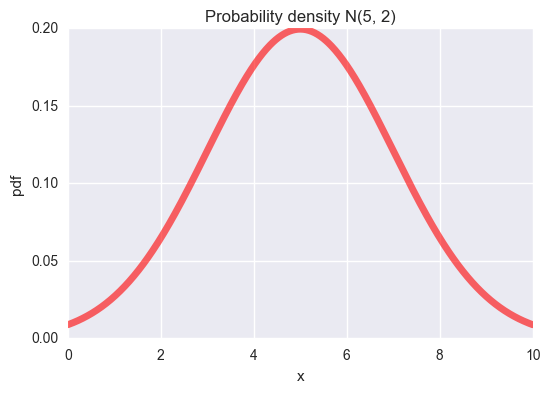

In [4]:
plt.plot(values, norm.pdf(values, loc=5, scale=2), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Probability density N(5, 2)')

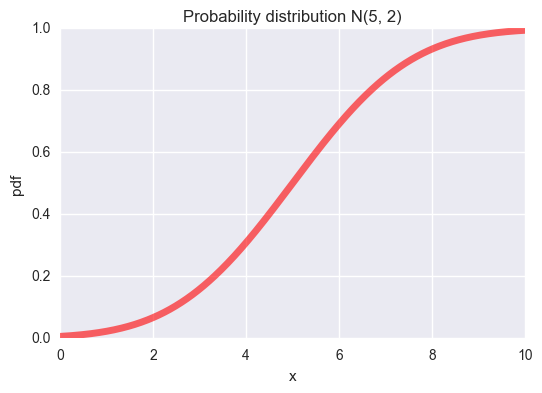

In [5]:
plt.plot(values, norm.cdf(values, loc=5, scale=2), 'r-', lw=5, alpha=0.6, label='norm cdf')
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Probability distribution N(5, 2)')

In [6]:
## Simulations control constants
epsilon = 0.1
mu = 5
sd = 2
sims = 3000
sample = 10
rv = norm(loc=mu, scale=sd)

In [7]:
sample = rv.rvs(size=10)
sample

array([ 4.15830706,  1.4486616 ,  8.22132637,  8.81046392,  2.08335233,
        7.41566208,  4.55126819,  4.99079844,  4.69319544,  5.67770062])

In [8]:
def generate_random_sample(n):
    return rv.rvs(size=n)

In [9]:
generate_random_sample(10)

array([ 4.94198294,  3.96663948,  2.24078957,  3.57077175,  5.32820822,
        4.38890347,  5.56086301,  3.90250977,  5.42304156,  5.72193052])

How well does $\bar{X}$ approximates $\mu$ as the sample size increase? $\lim_{n \rightarrow\infty}  P(|\bar{X}_n-\mu|>\epsilon)=0$ 

In [10]:
def x_bar_prob(sample_size, mu, epsilon, sims):
    ''' Return the probabitlity that x_bar is close to parameter mu'''
    abs_xbar_mu = np.zeros(sims)
    for i in range(sims):
        abs_xbar_mu[i] = ( np.abs(generate_random_sample(sample_size).mean() - mu) ) > epsilon
    return abs_xbar_mu.sum() / sims

In [11]:
x_bar_prob(sample_size=10, mu=mu, epsilon=epsilon, sims=sims)

0.86733333333333329

We set the sample size to vary from ten $(10)$ samples to $5000$ samples.

In [12]:
x = np.linspace(start=10, stop=5000, num=50)

p is the probability that the sample statistic is within $\epsilon$ of the model feature.

In [13]:
p = np.array([x_bar_prob(size, mu, epsilon, sims) for size in x])

In [14]:
#p

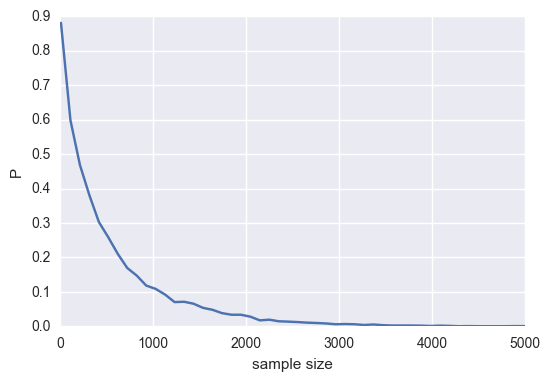

In [15]:
plt.plot(x, p)
plt.xlabel('sample size')
plt.ylabel('P')

How about the sample variance and the model variance? $\lim_{n \rightarrow\infty} P(|S_n^2-\sigma^2|>\epsilon)=0$

In [16]:
def Sn_bar_prob(sample_size, sd, epsilon, sims):
    ''' Return the probabitlity that x_bar is close to parameter mu'''
    abs_xbar_Sn = np.zeros(sims)
    for i in range(sims):
        abs_xbar_Sn[i] = ( np.abs((generate_random_sample(sample_size).std())**2 - sd**2) ) > epsilon
    return abs_xbar_Sn.sum() / sims

In [17]:
p = np.array([Sn_bar_prob(size, sd, epsilon, sims) for size in x])

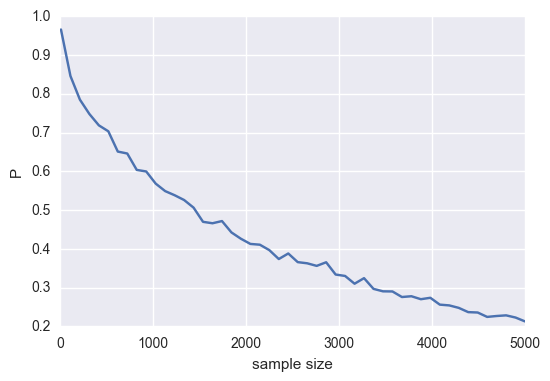

In [18]:
plt.plot(x, p)
plt.xlabel('sample size')
plt.ylabel('P')

Finally, what about the empirical cdf and the cdf? $\lim_{n \rightarrow\infty} P(|F_n(a)-F(a)|>\epsilon)=0$

In [19]:
def Fn_bar_prob(a, sample_size, epsilon, sims):
    ''' Return the probabitlity that x_bar is close to parameter mu'''
    abs_xbar_Fn = np.zeros(sims)
    for i in range(sims):
        ecdf = ECDF(generate_random_sample(sample_size)) 
        abs_xbar_Fn[i] = ( np.abs( ecdf(a) - rv.cdf(a)) ) > epsilon
    return abs_xbar_Fn.sum() / sims
    

In [20]:
ecdf = ECDF(generate_random_sample(1000))

In [21]:
ecdf(2.1)

0.070000000000000007

In [22]:
rv.cdf(2.1)

0.073529259609648359

In [23]:
Fn_bar_prob(a=2.1, sample_size= 1000, epsilon=.01, sims=3000)

0.21333333333333335

In [24]:
p = np.array([Fn_bar_prob(a=3, sample_size=size, epsilon=0.01, sims=3000) for size in x])

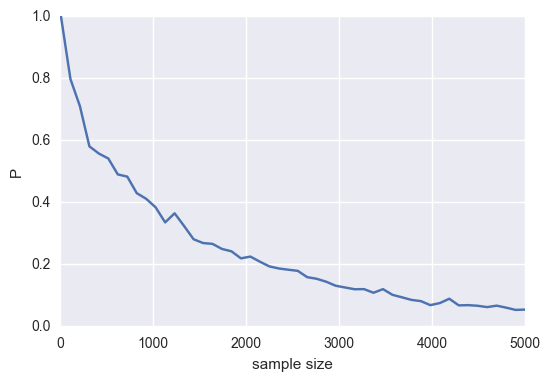

In [25]:
plt.plot(x, p)
plt.xlabel('sample size')
plt.ylabel('P')

In [197]:
#x